In [ ]:
#!pip install keras --upgrade

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from tensorflow.keras.layers import GRU

In [ ]:
df = pd.read_csv('/content/Electric_Production.csv',)

In [ ]:
df.shape

(397, 2)

In [ ]:
df.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        397 non-null    object 
 1   IPG2211A2N  397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [ ]:
df.rename(columns={'IPG2211A2N': 'Production'}, inplace=True)

In [ ]:
df.columns

Index(['DATE', 'Production'], dtype='object')

<Axes: >

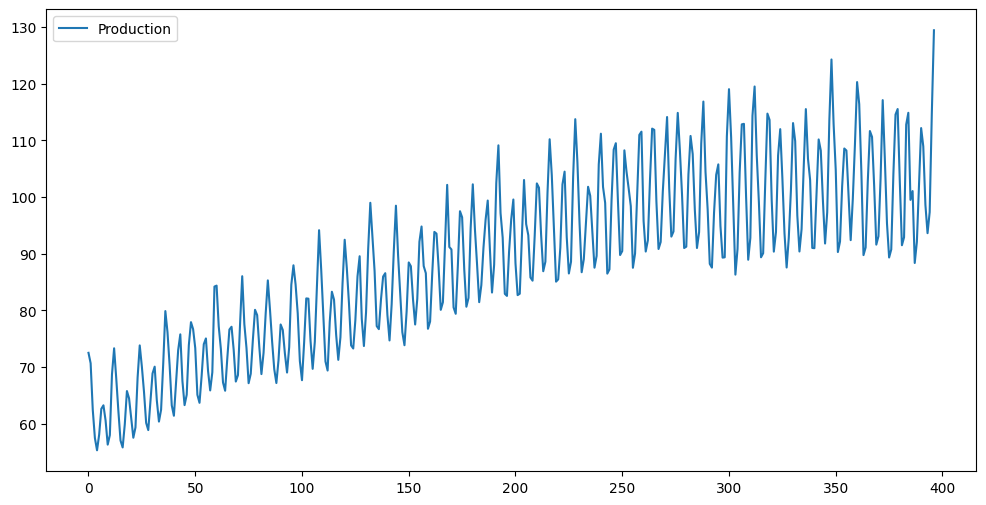

In [ ]:
# Plotting graph b/w production and date
df.plot(figsize=(12, 6))


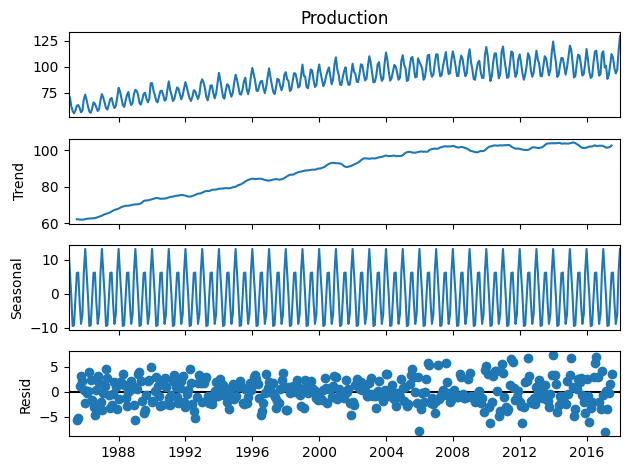

In [ ]:
df['DATE'] = pd.to_datetime(df['DATE']) # Convert 'DATE' column to datetime
df = df.set_index('DATE') # Set 'DATE' column as index

# Perform seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
results = seasonal_decompose(df['Production'])
results.plot();

In [ ]:
train = df.iloc[:156]
test = df.iloc[156:]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)


In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
# Import the TimeseriesGenerator class from tensorflow.keras.preprocessing.sequence

n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train,
                                scaled_train,
                                length=n_input,
                                batch_size=1)
X, y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train,
                                scaled_train,
                                length=n_input,
                                batch_size=1)

Given the Array: 
[0.39374366 0.35175374 0.1634313 ]
Predict this y: 
 [[0.04939061]]


In [ ]:

# define model
model = Sequential()
model.add(LSTM(100, activation='relu',
			input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()
model.fit(generator, epochs=10)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100)                 │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
 10/144 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.2296

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0798
Epoch 2/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0221
Epoch 3/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0206
Epoch 4/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0186
Epoch 5/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0241
Epoch 6/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0150
Epoch 7/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0164
Epoch 8/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0127
Epoch 9/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0104
Epoch 10/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0069


In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error

# Make predictions on the test data
test_predictions = []
first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]
  test_predictions.append(current_pred)
  current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

# Inverse transform the predictions and actual values
true_predictions = scaler.inverse_transform(test_predictions)
test['Predictions'] = true_predictions

# Calculate MAPE
mape = mean_absolute_percentage_error(test['Production'], test['Predictions'])
print(f'MAPE: {mape}')




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━

<ipython-input-16-c118f26e9d09>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [ ]:
# prompt: USE GRU now

import numpy as np
from tensorflow.keras.layers import GRU

# define model
model_gru = Sequential()
model_gru.add(GRU(100, activation='relu',
			input_shape=(n_input, n_features)))
model_gru.add(Dense(1))
model_gru.compile(optimizer='adam', loss='mse')
model_gru.summary()
model_gru.fit(generator, epochs=10)


# Make predictions on the test data
test_predictions_gru = []
first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
  current_pred = model_gru.predict(current_batch)[0]
  test_predictions_gru.append(current_pred)
  current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

# Inverse transform the predictions and actual values
true_predictions_gru = scaler.inverse_transform(test_predictions_gru)
test['Predictions_GRU'] = true_predictions_gru

# Calculate MAPE
mape_gru = mean_absolute_percentage_error(test['Production'], test['Predictions_GRU'])
print(f'MAPE (GRU): {mape_gru}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 100)                 │          30,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,001 (121.10 KB)

 Trainable params: 31,001 (121.10 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1251
Epoch 2/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0256
Epoch 3/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0210
Epoch 4/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0198
Epoch 5/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0132
Epoch 6/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0108
Epoch 7/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0077
Epoch 8/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0050
Epoch 9/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0049
Epoch 10/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0078
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━

<ipython-input-17-9a8899c0fa35>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions_GRU'] = true_predictions_gru


https://www.kaggle.com/datasets/shenba/time-series-datasets/code